<a href="https://colab.research.google.com/github/neural-data-science-lab/DL-intro-2022/blob/main/MNIST-CNN-Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import backend as keras_backend
from tensorflow.keras.utils import to_categorical
keras_backend.set_image_data_format('channels_last')

In [13]:
random_seed = 42
np.random.seed(random_seed)

# load MNIST data and save sizes
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_height = X_train.shape[1]
image_width = X_train.shape[2]
number_of_pixels = image_height * image_width

# convert to floating-point
X_train = Keras_backend.cast_to_floatx(X_train)
X_test = Keras_backend.cast_to_floatx(X_test)

# scale data to range [0, 1]
X_train /= 255.0
X_test /= 255.0

# save the original y_train and y_test
original_y_train = y_train
original_y_test = y_test

# replace label data with one-hot encoded versions
number_of_classes = 1 + max(np.append(y_train, y_test))
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

In [16]:
def show_demo_grid(seed):
    # Show a grid of random digits
    demo_grid = [[[] for x in range(10)] for y in range(10)] 
    num_found = 0
    attempts = 0
    np.random.seed(seed)
    while (num_found < 100) and (attempts < X_train.shape[0]):
        attempts += 1
        index = np.random.randint(0, X_train.shape[0])
        label = original_y_train[index]
        placed = False
        for column in range(10):
            if (not placed) and (not demo_grid[label][column]):
                num_found += 1
                demo_grid[label][column] = index
                placed = True

    plt.figure(figsize=(20,20))
    for y in range(10):
        for x in range(10):
            plt.subplot(10, 10, 1 + (y*10) + x)
            list_index = demo_grid[y][x]
            img = X_train[list_index].reshape(28, 28)
            plt.imshow(img, cmap=plt.get_cmap('gray'))
            frame = plt.gca()
            frame.axes.get_xaxis().set_visible(False)
            frame.axes.get_yaxis().set_visible(False)
    plt.show()

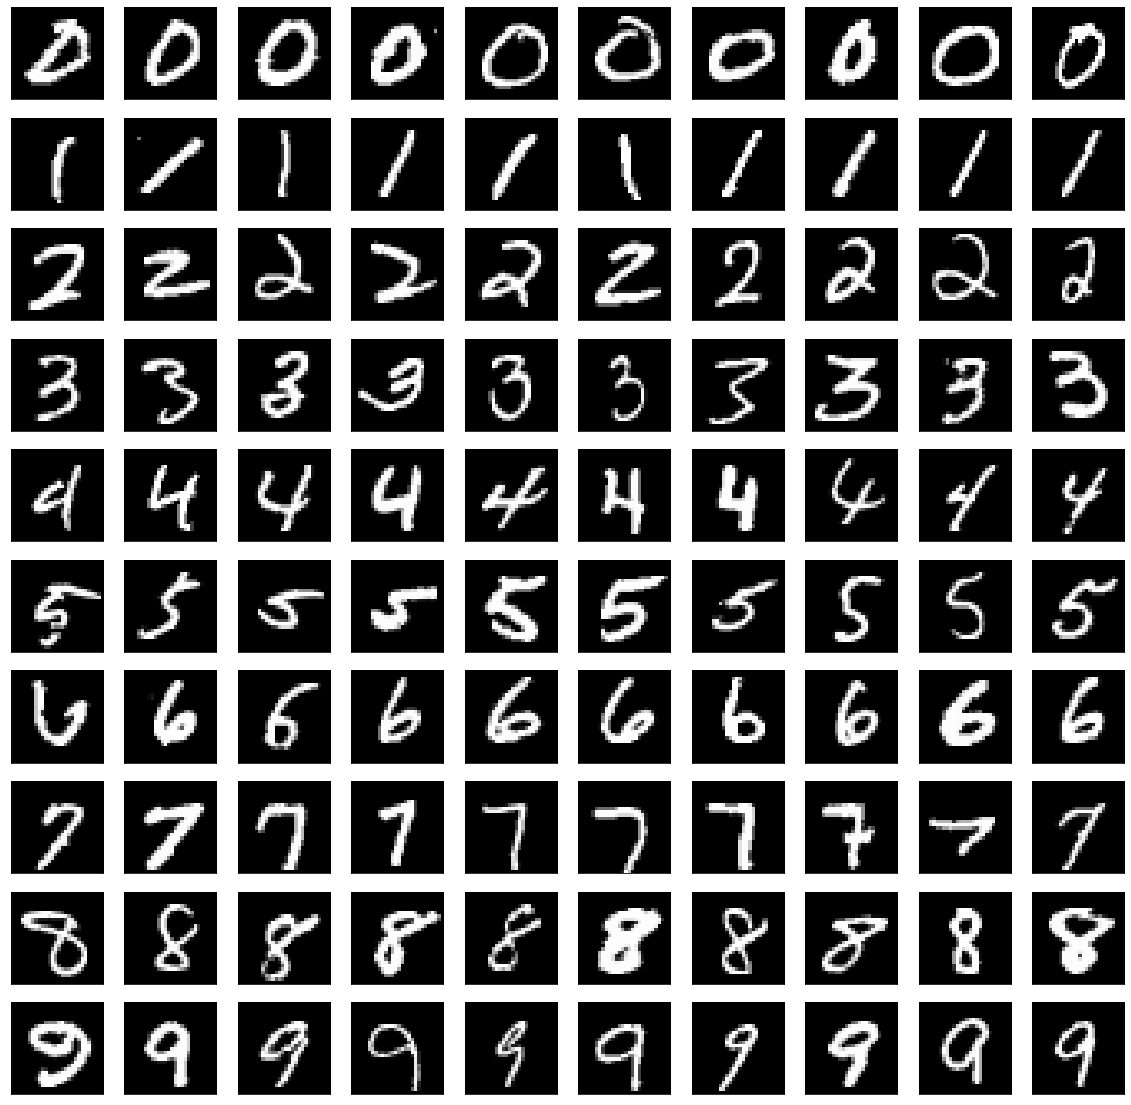

In [18]:
show_demo_grid(42)